# Static versus dynamic correlation correlation

## Bond-breaking

The most commonly used example to illustrate static vs dynamical correlation is H$_2$ dissociation:

In [1]:
import multipsi as mtp
import numpy as np
import matplotlib.pyplot as plt
import veloxchem as vlx

bohr_to_Å = 0.529177

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 8.


In [2]:
# HF calculation of H, equivalent to CI
mol_str = "H 0.0000 0.0000 0.0000"
molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

scf_drv = vlx.ScfUnrestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)
E_H_hf = scf_drv.get_scf_energy()


# H2 scan
mol_template = """
H 0.0000 0.0000 0.0000
H 0.0000 0.0000 dist
"""
scf_drv = vlx.ScfRestrictedDriver()
ci_drv = mtp.CIDriver()

distlist = [0.5, 0.6, 0.7, 0.75, 0.8,0.9,1.0,1.2,1.5,2,2.5,3,3.5,4,4.5,5]
E_hf = []
E_FCI = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("dist", str(dist))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")
    scf_results = scf_drv.compute(molecule, basis)
    
    E_hf.append(scf_drv.get_scf_energy() - 2*E_H_hf)
    
    space=mtp.OrbSpace(molecule,scf_drv.mol_orbs)
    space.fci()
    ci_results = ci_drv.compute(molecule,basis,space)
    E_FCI.append(ci_drv.get_energy() - 2*E_H_hf)
    
    # Save orbitals and densities for equilibrium value
    if dist == 0.75:
        eq_molecule = molecule
        eq_orbitals = scf_drv.mol_orbs
        eq_2density = ci_drv.get_active_2body_density(0)

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.106788495584    0.0000000000      0.03045659      0.00841139      0.00000000                
                  2        -1.106892338747   -0.0001038432      0.00069812      0.00020665      0.00725834                
                  3        -1.106892475138   -0.0000001364      0.00000920      0.00000317      0.00039011                
                

                                                                                                                          
        CI Iterations
        -------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm |   Time
     ----------------------------------------------------------
        1     -1.139173293     0.0e+00      4.3e-29   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                      

                  3        -1.126924692283   -0.0000001159      0.00000970      0.00000342      0.00036324                
                  4        -1.126924692303   -0.0000000000      0.00000002      0.00000001      0.00000477                
                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          
               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1269246923 a.u.                                              
               E

        1     -1.160904682     0.0e+00      7.5e-29   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                                                                          
* State 1
- Energy: -1.1609046824806666
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
1.96871 0.01801 0.00602 0.01801 0.00331 0.00331 0.00019 0.00015 0.00015 0.00001
* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                               

               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1287431348 a.u.                                              
               Electronic Energy                  :       -1.8343127493 a.u.                                              
               Nuclear Repulsion Energy           :        0.7055696145 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000210 a.u.                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.116294268816    0.0000000000      0.02764470      0.00815308      0.00000000                
                  2        -1.116391213357   -0.0000969445      0.00055877      0.00018803      0.00530657                
                  3        -1.116391300399   -0.0000000870      0.00001254      0.00000437      0.00032420                
                

                                                                                                                          
        CI Iterations
        -------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm |   Time
     ----------------------------------------------------------
        1     -1.154081706     0.0e+00      1.4e-29   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                      

                  3        -1.100153764817   -0.0000000751      0.00001420      0.00000490      0.00030702                
                  4        -1.100153764873   -0.0000000001      0.00000000      0.00000000      0.00000815                
                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          
               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1001537649 a.u.                                              
               E

        1     -1.140073481     0.0e+00      1.1e-29   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                                                                          
* State 1
- Energy: -1.1400734808710467
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
1.94416 0.04503 0.00565 0.00022 0.00217 0.00217 0.00027 0.00016 0.00016 0.00002
* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                               

               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.0611119978 a.u.                                              
               Electronic Energy                  :       -1.5020930069 a.u.                                              
               Nuclear Repulsion Energy           :        0.4409810091 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000004 a.u.                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.921886356635    0.0000000000      0.01150627      0.00406041      0.00000000                
                  2        -0.921908589697   -0.0000222331      0.00012300      0.00004281      0.00260878                
                  3        -0.921908594102   -0.0000000044      0.00000367      0.00000128      0.00008607                
                

                                                                                                                          
        CI Iterations
        -------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm |   Time
     ----------------------------------------------------------
        1     -1.017594114     0.0e+00      2.0e-29   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                      

                  3        -0.865330120137   -0.0000000002      0.00000130      0.00000045      0.00001924                
                  4        -0.865330120138   -0.0000000000      0.00000000      0.00000000      0.00000098                
                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          
               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.8653301201 a.u.                                              
               E

        1     -1.003129251     0.0e+00      4.9e-28   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                                                                          
* State 1
- Energy: -1.0031292512270582
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
1.30747 0.69238 0.00002 0.00001 0.00006 0.00003 0.00003 0.00001 0.00001 0.00000
* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                               

               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.8264478439 a.u.                                              
               Electronic Energy                  :       -1.0028402475 a.u.                                              
               Nuclear Repulsion Energy           :        0.1763924036 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002057 a.u.                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.782197472959    0.0000000000      0.00214017      0.00075393      0.00000000                
                  2        -0.782198208427   -0.0000007355      0.00000243      0.00000086      0.00053449                
                  3        -0.782198208429   -0.0000000000      0.00000007      0.00000003      0.00000212                
                

                                                                                                                          
        CI Iterations
        -------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm |   Time
     ----------------------------------------------------------
        1     -0.998606186     0.0e+00      1.2e-24   0:00:00
                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                      

                                                                                                                          
               *** SCF converged in 2 iterations. Time: 0.01 sec.                                                         
                                                                                                                          
               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.7702462424 a.u.                                              
               Electronic Energy                  :       -0.8878411782 a.u.                                              
               Nuclear Repulsion Energy           :        0.1175949358 a.u.                                              
               -

                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                                                                          
* State 1
- Energy: -0.9985690947312205
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
1.01383 0.98617 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000
* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
  

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

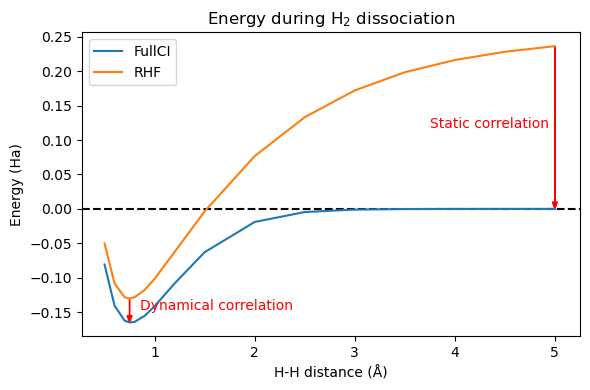

In [3]:
plt.figure(figsize=(6,4))
plt.title('Energy during H$_2$ dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
plt.axhline(y = 0, color = "k", linestyle = 'dashed')
plt.plot(x,y, label='FullCI')
plt.plot(x,z, label='RHF')
plt.arrow(x[3], z[3], 0, y[3]-z[3], length_includes_head = True, head_width = 0.05, head_length = 0.01, facecolor='r', edgecolor='r')
plt.annotate('Dynamical correlation', xy = (x[3]+0.1, 0.5*(z[3]+y[3])), color = 'r')
plt.arrow(x[-1], z[-1], 0, y[-1]-z[-1], length_includes_head = True, head_width = 0.05, head_length = 0.01, facecolor='r', edgecolor='r')
plt.annotate('Static correlation', xy = (x[-1]-1.25, 0.5*(z[-1]+y[-1])), color = 'r')
plt.xlabel("H-H distance (Å)")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.tight_layout(); plt.show()

Following Löwdin, we usually call correlation the difference between HF and FullCI. At short distance, this corresponds to our intuitive idea of electrons *dynamically* avoiding each other. However, at long distance, we expect one electron on each hydrogen atom, and there is no dynamical correlation. The error of Hartree-Fock is that even if one electron is on the first hydrogen, the second one is still equally shared between both hydrogens. We can visualize this using the functions written in "Electron correlation" chapter:

In [4]:
n=100

norb = space.n_active
origin = np.zeros((n, 3))
coords = np.zeros((n, 3))

def get_orbital_values(coords, molecule, basis, mol_orbs):
    orbital_values = []

    for i in range(norb):
        values = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, i, "alpha"))
        orbital_values.append(values)

    return orbital_values
def get_n12(ci_twopart_denmat, orbital_values_1, orbital_values_2): 
    
    hf_twopart_denmat = np.zeros((norb,norb,norb,norb))
    hf_twopart_denmat[0,0,0,0] = 2.0 # first MO is doubly occupied
    # Two-particle densities for FCI
    n12_hf = np.zeros(n)
    n12_fci = np.zeros(n)

    for i in range(norb):
        for j in range(norb):
            for k in range(norb):
                for l in range(norb):
                    
                    n12_hf += (
                        hf_twopart_denmat[i, j, k, l]
                        * orbital_values_1[i]
                        * orbital_values_1[j]
                        * orbital_values_2[k]
                        * orbital_values_2[l]
                    )
                        
                    n12_fci += (
                        ci_twopart_denmat[i, j, k, l]
                        * orbital_values_1[i]
                        * orbital_values_1[j]
                        * orbital_values_2[k]
                        * orbital_values_2[l]
                    )

    return n12_hf, n12_fci

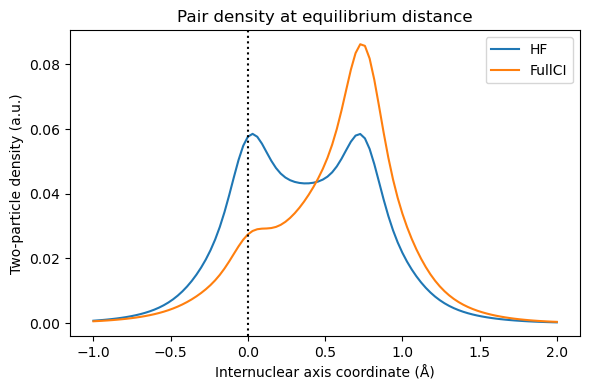

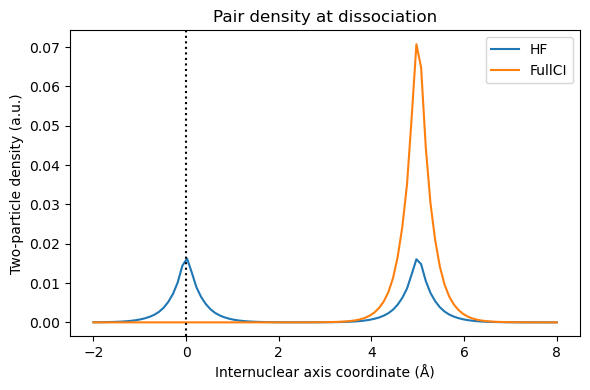

In [9]:
z = np.linspace(-1, 2, n)
coords[:, 2] = z
vis_drv = vlx.VisualizationDriver()

orbital_values = get_orbital_values(coords/bohr_to_Å, eq_molecule, basis, eq_orbitals)
orbital_values_at_H1 = get_orbital_values([[0, 0, 0]], eq_molecule, basis, eq_orbitals)
n12_hf, n12_fci = get_n12(eq_2density, orbital_values_at_H1, orbital_values)

plt.figure(figsize=(6,4))
plt.title('Pair density at equilibrium distance')
plt.plot(z,n12_hf, label='HF')
plt.plot(z,n12_fci, label='FullCI')
plt.axvline(x = 0, color = 'k', linestyle = ':')
plt.xlabel("Internuclear axis coordinate (Å)")
plt.ylabel("Two-particle density (a.u.)")
plt.legend()
plt.tight_layout(); plt.show()

z = np.linspace(-2, 8, n)
coords[:, 2] = z

orbital_values = get_orbital_values(coords/bohr_to_Å, molecule, basis, scf_drv.mol_orbs)
orbital_values_at_H1 = get_orbital_values([[0, 0, 0]], molecule, basis, scf_drv.mol_orbs)
ci_twopart_denmat = ci_drv.get_active_2body_density(0)
n12_hf, n12_fci = get_n12(ci_twopart_denmat, orbital_values_at_H1, orbital_values)

plt.figure(figsize=(6,4))
plt.title('Pair density at dissociation')
plt.plot(z,n12_hf, label='HF')
plt.plot(z,n12_fci, label='FullCI')
plt.axvline(x = 0, color = 'k', linestyle = ':')
plt.xlabel("Internuclear axis coordinate (Å)")
plt.ylabel("Two-particle density (a.u.)")
plt.legend()
plt.tight_layout(); plt.show()

This correlation is called by contrast "static" or "non-dynamical" or sometimes simply "strong" correlation. In practice both type of correlation have the same physical origin. If one electron is on one atom, the second electron is more likely to be on the second one. However, at long distances, the presence of one electron on one nucleus guarantees that the second electron is on the other one. Both types of correlation are also treated with the same excited determinants. But the distinction is useful as they may guide the way we calculate such systems.

While H$_2$ is the most used example, in practice whenever one breaks a bond homolytically (i.e. at dissociation each fragment gets one electron), static correlation will be a problem. However, in chemistry, we rarely break bonds in this way since the energy cost of doing so is simply too high. Even transition states typically form a bond while breaking another one, rarely getting a truly homolytic stage. Some exceptions are weaker bonds, like $\pi$ bonds that can be broken by a twisting motion for example, as well as excited states reaction where the energies are typically higher.

# At equilibrium distance

While true bond breakings are rare in chemistry, it turns out that static/strong correlation can occur even at equilibrium distance. One way to easily detect such thing is by looking at occupation numbers in a CI (or MCSCF) calculations. As explained in the MCSCF chapter, correlation will show as a difference in occupation number from the integers we expect. For standard dynamical correlation, the occupation numbers will typically be around 1.98 for occupied orbitals and 0.02 for virtual orbitals, showing that the CI expansion contains some configurations exciting from the occupied to the virtual, but that the dominant configuration is still the Hartree-Fock reference.

However, in some cases, we get higher deviations from 2 and 0, for example let's look at ethene, including the carbon-carbon $\sigma$ and $\pi$ bonds in the active space:

In [10]:
mol_str = """
H  0.000000   0.923274   1.238289
H  0.000000  -0.923274   1.238289
H  0.000000   0.923274  -1.238289
H  0.000000  -0.923274  -1.238289
C  0.000000   0.000000   0.668188
C  0.000000   0.000000  -0.668188
 """

molecule = vlx.Molecule.read_str(mol_str)
molecule.set_charge(0)
molecule.set_multiplicity(1)
basis = vlx.MolecularBasis.read(molecule,"def2-sv(p)")

eht = mtp.OrbitalGuess()
guessorb = eht.compute(molecule,basis)

space = mtp.OrbSpace(molecule,guessorb)
space.cas_orbitals([5,6,8,13])
mcscfdrv = mtp.McscfDriver()
mcresults = mcscfdrv.compute(molecule,basis,space)

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/DEF2-SV_P_   
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: DEF2-SV(P)                                                                          
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

In [11]:
viewer = mtp.OrbitalViewer()
viewer.plot(molecule, basis, space)

Output()

Dropdown(description='Orbital:', index=7, options=(('  1 occ=2.000 ene=-11.215', 0), ('  2 occ=2.000 ene=-11.2…

Checkbox(value=True, description='Active')

Output()

In [12]:
print(mcscfdrv.get_natural_occupations())

[1.98365473 1.92628565 0.0735003  0.01655932]


The first and last orbitals are the $\sigma$ - $\sigma^*$ pairs and have an occupation number around 1.98 as expected. However, the second and third, the $\pi$ - $\pi^*$, have an occupation number of 1.93, which, while still far from a fully broken bond, differ more than expected from 2 and 0. Were we to perform a scan elongating the C-C bond, we would see that the $\pi$ bond occupation numbers are simply shifted by around 0.55 Å.

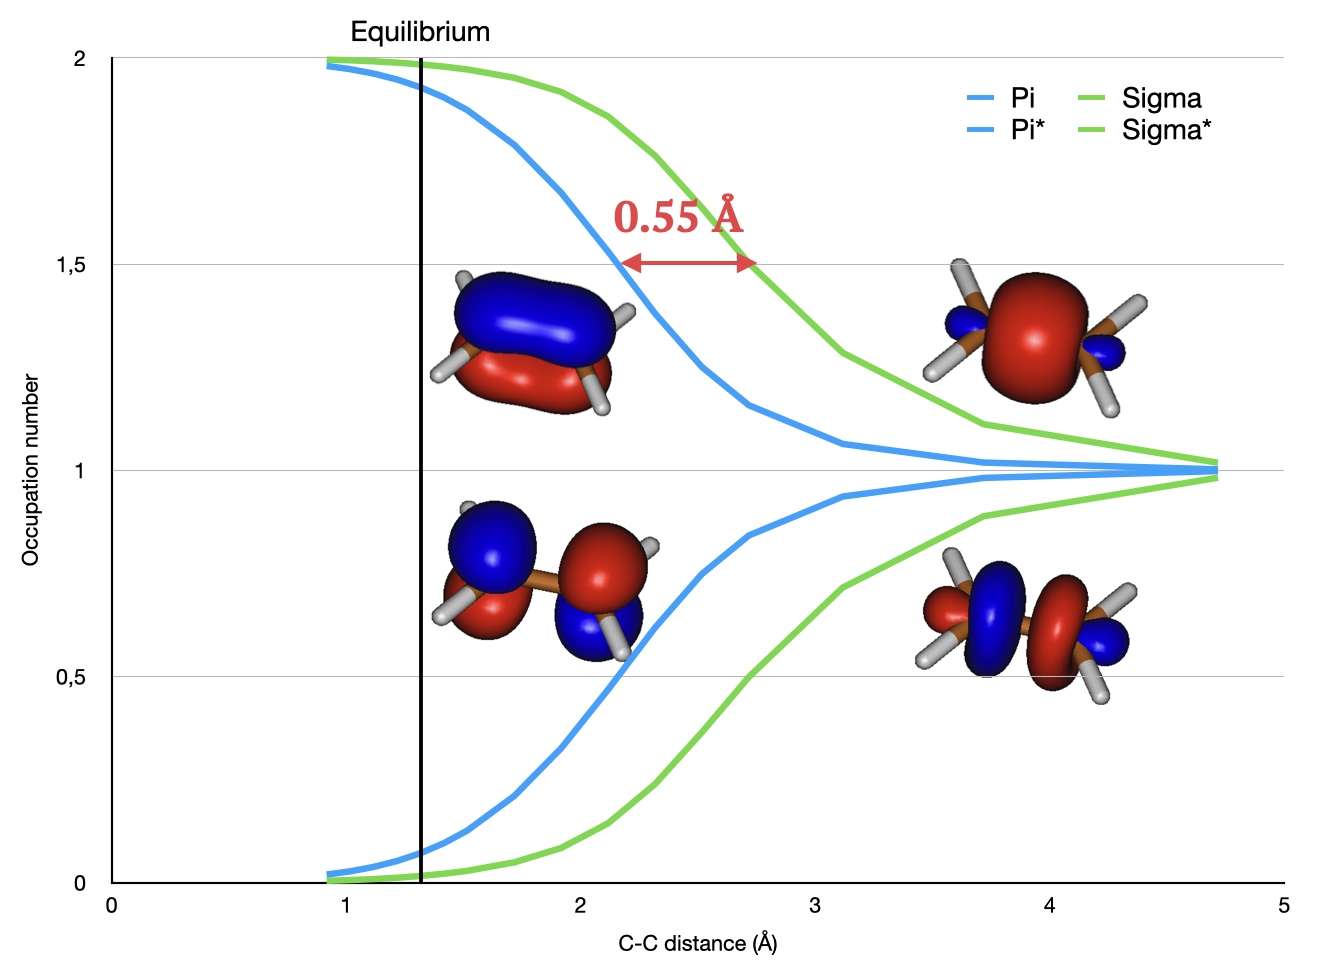

In [13]:
from IPython.display import Image
Image(filename="../../img/tutorials/ethene_bond_breaking.png", width=400)

The reason for this is that at the equilibrium distance, the $\pi$ bond is indeed stretched. It is visible if we look at the radial profile of the orbitals:

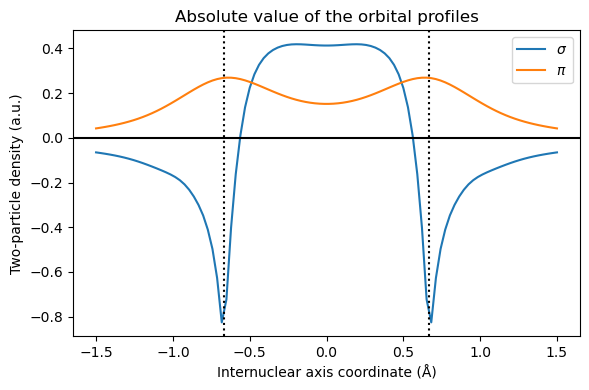

In [78]:
coords = np.zeros((n, 3))
z = np.linspace(-1.5, 1.5, n)
coords[:, 2] = z

coords_shifted = np.zeros((n, 3))
coords_shifted[:, 0] = 0.35 # Pi orbitals are 0 in the xy plane, so we compute them at shifted x value
coords_shifted[:, 2] = z

sigma = np.array(vis_drv.get_mo(coords/bohr_to_Å, molecule, basis, space.molecular_orbitals, 6, "alpha"))
pi = np.array(vis_drv.get_mo(coords_shifted/bohr_to_Å, molecule, basis, space.molecular_orbitals, 7, "alpha"))

# Make sure the sign is the same in the middle of the bond
sigma*= np.sign(sigma[50])
pi*= np.sign(pi[50])

sigma_max = abs(z[np.argmax(sigma)])
pi_max = abs(z[np.argmax(pi)])

plt.figure(figsize=(6,4))
plt.title('Absolute value of the orbital profiles')
plt.plot(z,sigma, label='$\sigma$')
plt.plot(z,pi, label='$\pi$')
plt.xlabel("Internuclear axis coordinate (Å)")
plt.ylabel("Two-particle density (a.u.)")
plt.axhline(y = 0, color = "k")
plt.axvline(x = 0.668188, color = 'k', linestyle = ':')
plt.axvline(x = -0.668188, color = 'k', linestyle = ':')
plt.legend()
plt.tight_layout(); plt.show()

It is clear in this orbital profile that the distance between the maxima of the $\sigma$ is shorter than that of the $\pi$. This also explains why double bonds are shorter than single bonds. The $\pi$ bond wants to be much shorter but is prevented by the Fermi repulsion in the $\sigma$ bond. The resulting bond length is shorter than a pure $\sigma$ but still too long for the $\pi$ bond that becomes stretched and thus displays some light amount of static correlation.

This situation is very general, and whenever bonds get "frustrated" due to the electronic repulsion of other bonds, they may be stretched and display static correlation even in the equilibrium structure. While the $\pi$ bond of ethene is still arguably a mild case, some can get much more pronounced such as the N-N bond is NO dimer or most metal-metal bonds, including the famous chromium dimer:

In [79]:
mol_str = """
Cr 0.0 0.0 -0.825
Cr 0.0 0.0  0.825
 """

molecule = vlx.Molecule.read_str(mol_str)
molecule.set_charge(0)
molecule.set_multiplicity(1)
basis = vlx.MolecularBasis.read(molecule,"def2-sv(p)")

eht = mtp.OrbitalGuess()
guessorb = eht.compute(molecule,basis)

space = mtp.OrbSpace(molecule,guessorb)
space.cas(12,12)
mcscfdrv = mtp.McscfDriver()
mcresults = mcscfdrv.compute(molecule,basis,space)

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/DEF2-SV_P_   
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: DEF2-SV(P)                                                                          
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

In [80]:
print(mcscfdrv.get_natural_occupations())

[1.91211258 1.81415776 1.81415743 1.78607888 1.59981281 1.5998112
 0.40094621 0.40094459 0.20938908 0.18597459 0.18597426 0.09064061]
